# **Classificação**

Um problema de **classificação** em Machine Learning (ML) se refere a prever categorias ou classes aos quais uma observação do conjunto de dados pertence, com base em padrões identificados nos dados de treinamento.

Exemplos:
- Classificar se um e-mail é spam ou não
- Classificar se um câncer é maligno ou benigno
- Prever o risco de crédito  (default) de um cliente
- Prever o churn
- Prever a proabilidade de um paciente ter um ataque cardíaco ou não
- Detectar transações fraudalentas (conta bancária / cartão de crédito)
- Reconhecimento de imagens
- Prever se um colaborador vai deixar a empresa ou não (turnover)

## **Regressão Logística**

A regressão logística é um método estatístico utilizado para modelar a probabilidade de ocorrência de um evento binário (resultado de duas categorias) em função de uma ou mais variáveis independentes contínuas ou categóricas.

<img src="https://github.com/OviedoVR/ML_especializacao_2025/blob/main/assets/figures/logit-function.png?raw=true" width="600px"/>

Fonte: [(BITTENCOURT, 2012)](https://www.researchgate.net/publication/277818863_Regressao_logistica_politomica_revisao_teorica_e_aplicacoes)

> **Sucintamente:**

1. Parte-se de uma variável z:

\begin{equation}
  z = \beta_0 + \beta_1 X
\end{equation}

2. Aplica-se uma transformação em (a base é a função sigmoide):

\begin{equation}
  f(z) = \frac{1}{1+e^{-z}}
\end{equation}

3. Estima-se uma probabilidade de Y=1 (observação ser da classe 1):

\begin{equation}
  P(Y=1) = f(z)
\end{equation}


Com base nesses passos, tem como base uma função que retorna valores no intervalo de [0, 1]:

\begin{equation}
  ln \left(\frac{p} {1-p} \right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
\end{equation}

Onde:
- $p$: probabilidade do evento acontecer (por exemplo, a pessoa comprar um produto)
- $(1-p)$: complementar de $p$
- $X$: variável preditora
- $\beta_0$: intercepto (coeficiente)
- $\beta_i$: coeficientes das variáveis independente.

> **Interpretação**

* Aumento de $X$ (1 un.): $e^{x \beta_i}$
* Decréscimo de $X$ (1 un.): $e^{-x \beta_i}$

> **Exemplo**

Suponha um modelo de regressão logística que visa prever a probabilidade de falha em uma máquina industrial.

\begin{equation*}
  ln \left(\frac{p} {1-p} \right) = -4,5+0,09 \times \text{Pressao max} + 0,003 \times \text{Ciclos de operacao}
\end{equation*}

* Aumento de 1 bar na `Pressao max`:  aumenta em 9% a chance de falha:

\begin{equation*}
e^{0,09}=1,09
\end{equation*}

* Cada acréscimo de 100 ciclos em `Ciclos de operacao`:  aumenta em 35% a chance de falha

\begin{equation*}
e^{0,003 \times 100}=1,35
\end{equation*}

* Cada decréscimo de 100 ciclos em `Ciclos de operacao`:  reduz as chances de falha em aproximadamente 26% (1$-$0.74)

\begin{equation*}
e^{-0,003 \times 100}=0,74
\end{equation*}

* Probabilidade de falha para **50 bar** de pressão operacional máxima e **1300 ciclos** de operação:

\begin{array}{l}
  ln \left(\frac{p} {1-p} \right) = -4,5+0,09 \times (50) + 0,003 \times (1300)\\
  ln \left(\frac{p} {1-p} \right) = 3.9\\
  ln \left(odds \right) = 3.9 \rightarrow e^{3.9} = 49.4\\
 \cdots\\
  p=\frac{odds}{(1+odds)}=\frac{49.4}{(1+49.4)} \rightarrow  p=98 \%
\end{array}

In [21]:
# -- Manipulação:
import numpy as np
import pandas as pd

# -- Visualização:
import matplotlib.pyplot as plt
import seaborn as sns

# -- Modelagem:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [22]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao_2025/main/dados/customer_churn.csv' -O 'customer_churn.csv'

In [23]:
churn = pd.read_csv('customer_churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Dicionário de dados**

| Field              | Description                                                                                                                             |
|--------------------|-----------------------------------------------------------------------------------------------------------------------------------------|
| customerID         | Um ID único que identifica cada cliente                                                                                                |
| gender             | O gênero do cliente: Masculino, Feminino                                                                                               |
| SeniorCitizen      | Indica se o cliente é idoso (1) ou não (0)                                                                                            |
| Partner            | Indica se o cliente tem parceiro(a): Sim, Não                                                                                         |
| Dependents         | Indica se o cliente tem dependentes: Sim, Não                                                                                        |
| tenure             | Indica o total de meses que o cliente está com a empresa                                                                              |
| PhoneService       | Indica se o cliente assina serviço de telefone residencial: Sim, Não                                                                 |
| MultipleLines      | Indica se o cliente assina múltiplas linhas telefônicas: Sim, Não, ou Sem Serviço de Telefone residencial                               |
| InternetService    | Indica o tipo de serviço de internet contratado: DSL, Fibra Óptica, Cabo, ou Nenhum                                                    |
| OnlineSecurity     | Indica se o cliente assina serviço adicional de segurança online: Sim, Não                                                             |
| OnlineBackup       | Indica se o cliente assina serviço adicional de backup online: Sim, Não                                                                |
| DeviceProtection   | Indica se o cliente assina plano de proteção para o equipamento: Sim, Não                                                              |
| TechSupport        | Indica se o cliente assina suporte técnico avançado: Sim, Não                                                                          |
| StreamingTV        | Indica se o cliente usa o serviço para assistir TV via streaming: Sim, Não                                                             |
| StreamingMovies    | Indica se o cliente usa o serviço para assistir filmes via streaming: Sim, Não                                                         |
| Contract           | Indica o tipo de contrato atual do cliente: Mensal, Um Ano, Dois Anos                                                                  |
| PaperlessBilling   | Indica se o cliente optou pelo faturamento sem papel: Sim, Não                                                                         |
| PaymentMethod      | Indica o método de pagamento: Débito Bancário, Cartão de Crédito, Boleto                                                      |
| MonthlyCharges     | Indica o valor total cobrado mensalmente ao cliente                                                                                     |
| TotalCharges       | Indica o valor total cobrado ao cliente até o momento                                                                                   |
| Churn              | 1 se o cliente saiu (churn), 0 caso contrário                                                                                          |

In [24]:
churn.shape

(7043, 21)

In [25]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
churn = churn[[
    'Partner', 'Dependents','tenure', 'TechSupport',
    'Contract', 'PaymentMethod', 'MonthlyCharges',
    'TotalCharges', 'Churn'
]]
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Partner         7043 non-null   object 
 1   Dependents      7043 non-null   object 
 2   tenure          7043 non-null   int64  
 3   TechSupport     7043 non-null   object 
 4   Contract        7043 non-null   object 
 5   PaymentMethod   7043 non-null   object 
 6   MonthlyCharges  7043 non-null   float64
 7   TotalCharges    7043 non-null   object 
 8   Churn           7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [27]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

In [28]:
churn['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [29]:
churn.isna().sum()

,0
Partner,0
Dependents,0
tenure,0
TechSupport,0
Contract,0
PaymentMethod,0
MonthlyCharges,0
TotalCharges,11
Churn,0


In [30]:
churn.groupby('Churn')[['Churn']].value_counts() / len(churn) * 100

,count
Churn,
No,73.463013
Yes,26.536987


### **Desbalanceamento**

> **Undersampling**: reduz o número de instâncias na classe majoritária para equilibrar a distribuição das classes. Desvantagem: perda de informação.

> **Oversampling**:  duplica aleatoriamente instâncias da classe minoritária até que o número de instâncias dessa classe se iguale ao da classe majoritária. Desvantagem: pode tender ao *overfitting*.

- Base estatística: amostragem aleatória.

- Artigo: [Towards Data Science - **Oversampling and Undersampling: a technique for Imbalanced Classification**](https://medium.com/p/5e2bbaf56dcf)

> Exemplo de função no Python:

```python
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def resample_data(df, target_column, method='undersample', random_state=42):
    """
    Resamples the DataFrame using the specified method.
    
    Parameters:
    - df: DataFrame containing the data
    - target_column: Column name of the target variable
    - method: Resampling method ('undersample' or 'oversample')
    - random_state: Seed for reproducibility
    
    Returns:
    - resampled DataFrame
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    if method == 'undersample':
        sampler = RandomUnderSampler(random_state=random_state)
    elif method == 'oversample':
        sampler = RandomOverSampler(random_state=random_state)
    else:
        raise ValueError("Method must be 'undersample' or 'oversample'")
    
    X_res, y_res = sampler.fit_resample(X, y)
    print(f"New class distribution: {Counter(y_res)}")
    
    resampled_df = pd.DataFrame(X_res, columns=X.columns)
    resampled_df[target_column] = y_res.values
    
    return resampled_df

# Usos:
# Para undersampling
churn_undersampled = resample_data(churn, target_column='Churn', method='undersample')

# Para oversampling
churn_oversampled = resample_data(churn, target_column='Churn', method='oversample')
```

In [31]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def resample_data(df, target_column, method='undersample', random_state=42):
    """
    Resamples the DataFrame using the specified method.

    Parameters:
    - df: DataFrame containing the data
    - target_column: Column name of the target variable
    - method: Resampling method ('undersample' or 'oversample')
    - random_state: Seed for reproducibility

    Returns:
    - resampled DataFrame
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    if method == 'undersample':
        sampler = RandomUnderSampler(random_state=random_state)
    elif method == 'oversample':
        sampler = RandomOverSampler(random_state=random_state)
    else:
        raise ValueError("Method must be 'undersample' or 'oversample'")

    X_res, y_res = sampler.fit_resample(X, y)
    print(f"New class distribution: {Counter(y_res)}")

    resampled_df = pd.DataFrame(X_res, columns=X.columns)
    resampled_df[target_column] = y_res.values

    return resampled_df

# Supondo que 'churn' seja o seu DataFrame original
# Para undersampling
churn_undersampled = resample_data(churn, target_column='Churn', method='undersample')

# Para oversampling
churn_oversampled = resample_data(churn, target_column='Churn', method='oversample')

New class distribution: Counter({'No': 1869, 'Yes': 1869})
New class distribution: Counter({'No': 5174, 'Yes': 5174})


In [32]:
churn.groupby('Churn')[['Churn']].value_counts() / len(churn) * 100

,count
Churn,
No,73.463013
Yes,26.536987


In [33]:
churn_undersampled

,Partner,Dependents,tenure,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2134,No,No,1,No internet service,Month-to-month,Mailed check,20.15,20.15,No
2693,No,No,72,No internet service,Two year,Bank transfer (automatic),19.30,1414.80,No
1679,No,Yes,7,No,Month-to-month,Mailed check,45.75,344.20,No
5998,Yes,No,48,No internet service,Two year,Mailed check,20.05,1036.00,No
6798,No,No,13,No,Month-to-month,Mailed check,70.15,886.70,No
...,...,...,...,...,...,...,...,...,...
7021,No,No,12,Yes,One year,Electronic check,59.80,727.80,Yes
7026,No,No,9,No,Month-to-month,Bank transfer (automatic),44.20,403.35,Yes
7032,No,No,1,No,Month-to-month,Electronic check,75.75,75.75,Yes
7034,No,No,67,No,Month-to-month,Credit card (automatic),102.95,6886.25,Yes


In [34]:
# Verificar a nova distribuição de classes no DataFrame undersampled
churn_undersampled['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,50.0
Yes,50.0


In [35]:
# Verificar a nova distribuição de classes no DataFrame oversampled
churn_oversampled['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,50.0
Yes,50.0


In [36]:
churn.groupby('Churn')[['Churn']].value_counts() / len (churn) * 100

,count
Churn,
No,73.463013
Yes,26.536987


In [37]:
churn_raw = churn.copy()

### **Encoding**

In [38]:
churn['TechSupport'] = churn['TechSupport'].replace('Yes', 1).replace('No', 0).replace('No internet service', 2)
churn['Partner'] = churn['Partner'].replace('Yes', 1).replace('No', 0)
churn['Dependents'] = churn['Dependents'].replace('Yes', 1).replace('No', 0)

/tmp/ipython-input-38-2108885116.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn['TechSupport'] = churn['TechSupport'].replace('Yes', 1).replace('No', 0).replace('No internet service', 2)
/tmp/ipython-input-38-2108885116.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn['Partner'] = churn['Partner'].replace('Yes', 1).replace('No', 0)
/tmp/ipython-input-38-2108885116.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly 

In [39]:
churn['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [40]:
churn['Contract'] = churn['Contract'].replace('Month-to-month', 0).replace('One year', 1).replace('Two year', 2)

/tmp/ipython-input-40-351819900.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn['Contract'] = churn['Contract'].replace('Month-to-month', 0).replace('One year', 1).replace('Two year', 2)


In [41]:
churn['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [42]:
churn['PaymentMethod'] = churn['PaymentMethod'].replace('Mailed check', 0)\
  .replace('Electronic check', 1).replace('Bank transfer (automatic)', 2)\
  .replace('Credit card (automatic)', 3)

/tmp/ipython-input-42-2169446183.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace('Credit card (automatic)', 3)


In [43]:
churn['Churn'] = churn['Churn'].replace('No', 0).replace('Yes', 1)
churn['Churn'] = churn['Churn'].astype('int64')

/tmp/ipython-input-43-2749695859.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn['Churn'] = churn['Churn'].replace('No', 0).replace('Yes', 1)


In [44]:
churn.tail()

,Partner,Dependents,tenure,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,1,1,24,1,1,0,84.80,1990.50,0
7039,1,1,72,0,1,3,103.20,7362.90,0
7040,1,1,11,0,0,1,29.60,346.45,0
7041,1,0,4,0,0,0,74.40,306.60,1
7042,0,0,66,1,2,2,105.65,6844.50,0


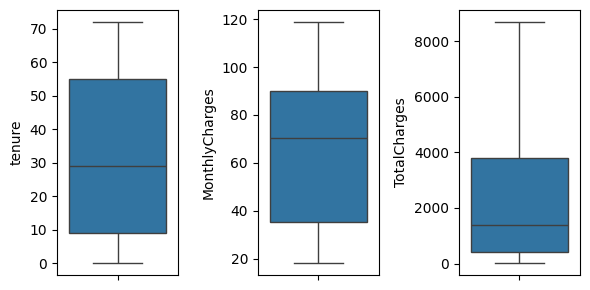

In [45]:
fig, ax = plt.subplots(1,3, figsize=(6,3))
sns.boxplot(data=churn, y='tenure', ax=ax[0])
sns.boxplot(data=churn, y='MonthlyCharges', ax=ax[1])
sns.boxplot(data=churn, y='TotalCharges', ax=ax[2])
plt.tight_layout()

In [46]:
churn_sem_outliers = churn.query('TotalCharges <= 8000 ')

print(churn.shape)
print(churn_sem_outliers.shape)

(7043, 9)
(6954, 9)


### **Modelagem**

In [47]:
# Nulos:
churn.dropna(axis=0, inplace=True)

# Dividir os dados em variáveis independentes (X) e dependentes (Y)
features = churn.drop('Churn', axis=1)
target = churn[['Churn']]

# Dividir os dados em conjuntos de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(features, target, test_size=0.3, random_state=35)

# Normalização (treino)
x_treino['tenure'] = churn['tenure'].apply(lambda x: (x - x_treino['tenure'].mean()) / x_treino['tenure'].std() )
x_treino['MonthlyCharges'] = x_treino['MonthlyCharges'].apply(lambda x: (x - x_treino['MonthlyCharges'].mean()) / x_treino['MonthlyCharges'].std() )
x_treino['TotalCharges'] = x_treino['TotalCharges'].apply(lambda x: (x - x_treino['TotalCharges'].mean()) / x_treino['TotalCharges'].std() )
# Normalização (teste)
x_teste['tenure'] = churn['tenure'].apply(lambda x: (x - x_teste['tenure'].mean()) / x_teste['tenure'].std() )
x_teste['MonthlyCharges'] = x_teste['MonthlyCharges'].apply(lambda x: (x - x_teste['MonthlyCharges'].mean()) / x_teste['MonthlyCharges'].std() )
x_teste['TotalCharges'] = x_teste['TotalCharges'].apply(lambda x: (x - x_teste['TotalCharges'].mean()) / x_teste['TotalCharges'].std() )

# Treinar o modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(x_treino, y_treino)

# Fazer previsões nos conjuntos de treino e teste
ypred_treino = modelo.predict(x_treino)
ypred_teste = modelo.predict(x_teste)

# Medir a acurácia nos conjuntos de treino e teste
resultado_treino = accuracy_score(y_treino, ypred_treino)
resultado_teste = accuracy_score(y_teste, ypred_teste)

print(f'Acurácia do modelo no conjunto de treino: {round(resultado_treino * 100, 1)} %')
print(f'Acurácia do modelo no conjunto de teste: {round(resultado_teste * 100, 1)} %')

Acurácia do modelo no conjunto de treino: 79.3 %
Acurácia do modelo no conjunto de teste: 78.4 %


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
print('Predições')
print(ypred_teste[0:14])
print('\nProbabilidades')
print(np.round(modelo.predict_proba(x_teste)[0:14, 1], 2))

Predições
[0 0 0 0 0 1 1 0 0 0 0 1 0 0]

Probabilidades
[0.04 0.17 0.44 0.41 0.35 0.55 0.59 0.   0.24 0.   0.16 0.67 0.11 0.01]


In [49]:
# Alterando a probabilidade de corte:
probs = modelo.predict_proba(x_teste)[:, 1]
threshold = 0.6
ypred_custom = (probs >= threshold).astype(int)

# Predições:
print('Predições com threshold =', threshold)
print(ypred_custom[0:14])

print('\nProbabilidades da classe 1')
print(np.round(probs[0:14], 2))

Predições com threshold = 0.6
[0 0 0 0 0 0 0 0 0 0 0 1 0 0]

Probabilidades da classe 1
[0.04 0.17 0.44 0.41 0.35 0.55 0.59 0.   0.24 0.   0.16 0.67 0.11 0.01]


### **Validação**

> **Matriz de confusão**

<img src="https://github.com/OviedoVR/ML_especializacao_2025/blob/main/assets/figures/confusion-matrix.png?raw=true" width="100%"/>

- Matriz de confusão permite obter as seguintes métricas:
\begin{array}{ll}
\textrm{Acurácia} &= \frac{VP + VN}{VP + VN + FP + FN} \\
\textrm{Precisão} &= \frac{VP}{VP + FP} \\
\textrm{Recall} &= \frac{VP}{VP + FN} \\
\textrm{Especificidade} &= \frac{VN}{VN + FP} \\
\textrm{F1 score} &= 2 \times \frac{\textrm{Precisão} \times \textrm{Recall}}{\textrm{Precisão} + \textrm{Recall}}
\end{array}

Onde:

> **Acurácia:** é a proporção de previsões corretas que um modelo faz em relação ao total de previsões. "*De tmaneira geral, quanto o modelo está acertando?*"

> **Precisão:** "*De todas as observações que o modelo disse que eram positivas, quantos realmente foram?*". É útil para entender a confiabilidade das previsões positivas.

> **Recall (Sensibilidade):** "*De todos os valores reais positivos, quantos o modelo disse seriam?*". É útil para medir a capacidade do modelo em encontrar todos os exemplos positivos.

> **Especificidade:** A especificidade é a proporção de exemplos negativos identificados corretamente pelo modelo em relação a todos os exemplos que são realmente negativos. É útil para medir a capacidade do modelo em evitar falsos positivos em uma classe específica. "*De todos os valores reais negativos, quantos o modelo disse seriam?*"

> **F1 score:** O F1 score é uma média harmônica da precisão e do recall. Ele fornece uma única métrica que equilibra precisão e recall, sendo útil quando há um desequilíbrio entre as classes de interesse, ajudando a avaliar o desempenho geral do modelo de forma mais balanceada. Um F1 score mais alto indica um melhor equilíbrio entre precisão e recall.

* Além disso, é possível estimar o retorno de um modelo de classificação pela matriz de confusão (e.g., comparar dois modelos diferentes e o retorno para o negócio): [**Extracting value from the confusion-matrix**](https://medium.com/@vo.freelancer5/extracting-value-from-the-confusion-matrix-21ec737fad20).

In [50]:
# Relatório de classificação para o conjunto de treino:
print("Relatório de classificação para o conjunto de treino:")
print(classification_report(y_treino, ypred_treino))

Relatório de classificação para o conjunto de treino:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3633
           1       0.62      0.53      0.57      1289

    accuracy                           0.79      4922
   macro avg       0.73      0.71      0.72      4922
weighted avg       0.78      0.79      0.79      4922



In [51]:
print(classification_report(y_teste, ypred_teste))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1530
           1       0.63      0.52      0.57       580

    accuracy                           0.78      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110



In [52]:
# Matriz de confusão para o conjunto de teste
print("Matriz de confusão para o conjunto de teste:")
print(confusion_matrix(y_teste, ypred_teste))

Matriz de confusão para o conjunto de teste:
[[1353  177]
 [ 278  302]]


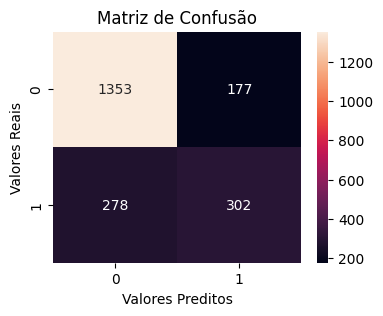

In [53]:
# Visualizando a matriz  de confusão
matriz = confusion_matrix(y_teste, ypred_teste)
plt.figure(figsize=(4,3))
sns.heatmap(matriz,annot=True,fmt='d')
plt.xlabel('Valores Preditos');
plt.ylabel('Valores Reais');
plt.title('Matriz de Confusão');

#### **Curva ROC e AUC**

> **Curva ROC (Receiving Operating Characteristics):**

<img src="https://github.com/OviedoVR/ML_especializacao_2025/blob/main/assets/figures/ROC-AUC.png?raw=true" width="500px"/>

- Valores no intervalo de [0, 1]
- Valores ideais: próximos de 1



> **Área sob a curva (AUC)**: quantifica a habilidade de um modelo de classificação em distinguir entre as classes.

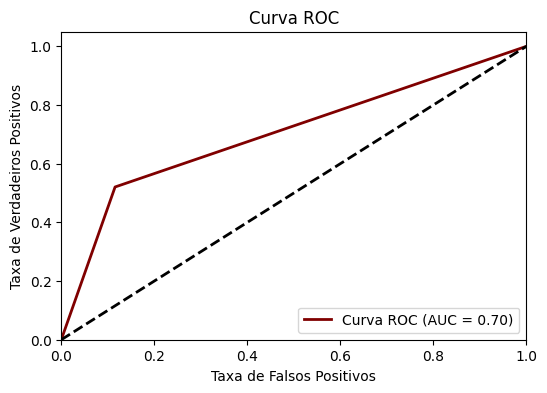

In [54]:
# Calcular a curva ROC e a AUC
fpr, tpr, thresholds = roc_curve(y_teste, ypred_teste)
roc_auc = roc_auc_score(y_teste, ypred_teste)

# Plotar a curva ROC
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(fpr, tpr, color='maroon', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## **Naive-Bayes**

- Problemas de classificação binária ou multi-classes
- **Base:** Teorema de Bayes
- Pressuposto: independência das variáveis
- Robusto a *outliers*
- Valores null não impedem a classificação (estimador de LaPlace)
- Atributos correlacionados $\rightarrow$ interfere no desempenho
- Interessante para amostras pequenas
- Classifica de acordo com a classe mais provável
- Equação:

\begin{equation}
P (y_i | x) = \frac{ P(x|y_i) P(y_i) }{ P(x) }
\end{equation}

Onde:
- $P (y_i | x)$: probabilidade a posteriori
- $P(x|y_i)$: verossimilhança ou *likelihood*
- $P (y_i)$: probabilidade a priori (da classe)
- $P(x)$: probabilidade de ocorreância (objetos/observações)

Lembrando que:
- $P(A/B)$: lê-se probabilidade condicional de A com B

> No Python:

```python
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carregar o conjunto de dados Iris
x = dados.drop('target', axis=1)
y = dados['target']

# Dividir os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Treinar o modelo Gaussian Naive Bayes
model = GaussianNB()
model.fit(x_train, y_train)
```


In [55]:
from sklearn.naive_bayes import GaussianNB

# Treinar o modelo Gaussian Naive Bayes
model = GaussianNB()
model.fit(x_treino, y_treino)

# Fazer previsões nos conjuntos de treino e teste
y_train_pred = model.predict(x_treino)
y_test_pred = model.predict(x_teste)

# Medir a acurácia nos conjuntos de treino e teste
train_accuracy = round(accuracy_score(y_treino, y_train_pred), 1)
test_accuracy = round(accuracy_score(y_teste, y_test_pred), 1)

print(f'Acurácia no conjunto de treino: {train_accuracy}%')
print(f'Acurácia no conjunto de teste: {test_accuracy}%')

# Matriz de confusão para o conjunto de teste
print("Matriz de confusão para o conjunto de teste:")
print(confusion_matrix(y_teste, y_test_pred))

Acurácia no conjunto de treino: 0.7%
Acurácia no conjunto de teste: 0.7%
Matriz de confusão para o conjunto de teste:
[[1127  403]
 [ 150  430]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


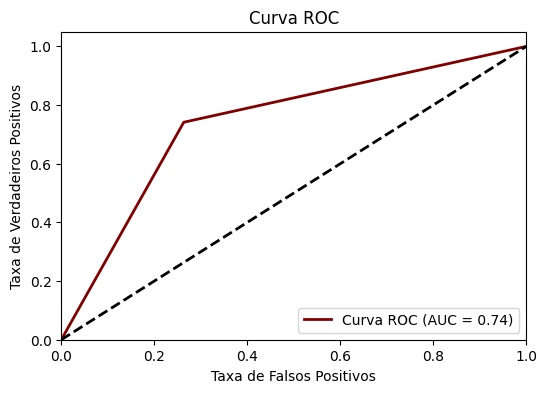

In [56]:
# Calcular a curva ROC e a AUC
fpr, tpr, thresholds = roc_curve(y_teste, y_test_pred)
roc_auc = roc_auc_score(y_teste, y_test_pred)

# Plotar a curva ROC
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(fpr, tpr, color='maroon', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

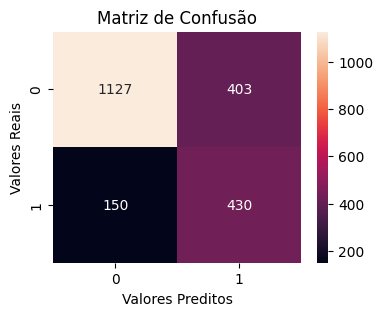

In [57]:
# Visualizando a matriz  de confusão
matriz_NB = confusion_matrix(y_teste, y_test_pred)
plt.figure(figsize=(4,3))
sns.heatmap(matriz_NB,annot=True,fmt='d')
plt.xlabel('Valores Preditos');
plt.ylabel('Valores Reais');
plt.title('Matriz de Confusão');

## **Decision Tree**

<img src="https://github.com/OviedoVR/ML_especializacao_2025/blob/main/assets/figures/decision-tree-example.png?raw=true" width="80%"/>

Fonte: [Interpretable AI: Decision Trees](https://medium.com/@shrutimisra/interpretable-ai-decision-trees-f9698e94ef9b)


- Nós (raíz, pai, filho): teste/decisão
- Folhas
- Ao final de um conjunto de testes e regras, tem-se as decisões finais ou classes.
- Objetivo é maximizar o ganho de informação (IG) e minimizar a Entropia (E)
- Problemas classificação binária ou multi-classe.
- Também pode ser usado para regressão, assim como KNN, e Random Forests.
- Desvantagem: sensibilidade aos dados de treino.

> **Entropia:**

\begin{equation}
  E = \sum -p_i \cdot log(p_i)
\end{equation}

Onde:
- $p_i$: probabilidade (classe i)

<br>

> **Ganho de informação:**

\begin{equation}
  IG = E_{pai} - \sum w_i \ E_{filho \ i }
\end{equation}

Onde:
- $E$: entropia
- $w_i$ peso do i-ésimo nó filho, calculado como a proporção do número de amostras no i-ésimo nó filho em relação ao número total de amostras no nó pai.

> No Python

``` python
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()

# treino/teste:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    features,
    target,
    test_size=0.2,
    random_state=35
)

# modelagem:
modelo = modelo.fit(features_train, target_train)

# resumo
modelo.__dict__

# predições
features = np.array([...])
prediction = modelo.predict(features.reshape(1, -1))
prediction
```

> Visualizando a árvore:

```python
import graphviz
from sklearn import tree

tree_data = tree.export_graphviz(modelo, out_file=None)
graph = graphviz.Source(tree_data)
graph
```  

### **Modelagem**

In [58]:
from sklearn.tree import DecisionTreeClassifier

# instanciando o modelo DT:
model_DT = DecisionTreeClassifier(criterion='entropy')

# modelagem:
model_DT = model_DT.fit(x_treino, y_treino)

# resumo
model_DT.__dict__

{'criterion': 'entropy',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'feature_names_in_': array(['Partner', 'Dependents', 'tenure', 'TechSupport', 'Contract',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges'], dtype=object),
 'n_features_in_': 8,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': np.int64(2),
 'max_features_': 8,
 'tree_': <sklearn.tree._tree.Tree at 0x7b8f9c6f7050>}

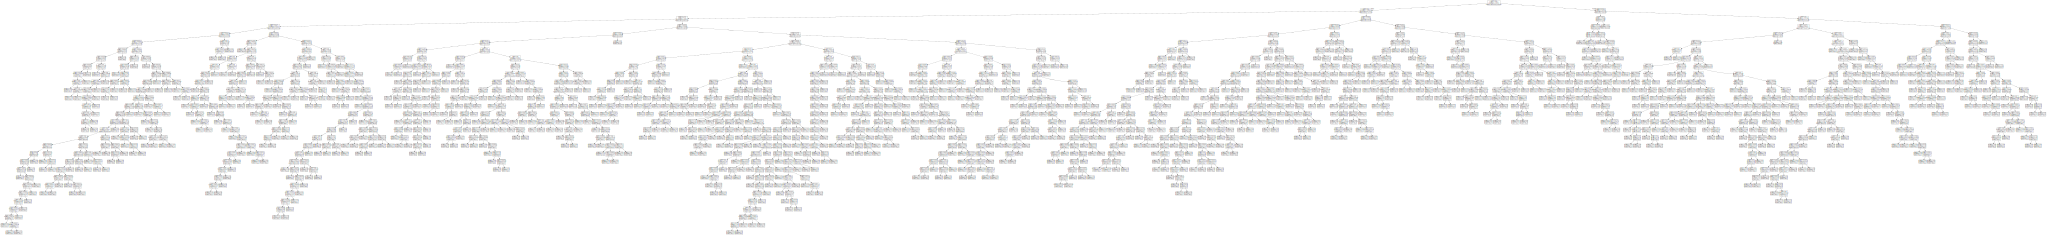

In [59]:
# Visualizando a árvore:
import graphviz
from sklearn import tree

tree_data = tree.export_graphviz(model_DT, out_file=None)
graph = graphviz.Source(tree_data)
graph

In [60]:
# predições
tenure = 10
monthly_charges = 15
total_charges= 150

# Cálculo da padronização:
tenure_std = (tenure - churn['tenure'].mean()) / churn['tenure'].std()
monthly_charges_std = (monthly_charges - churn['MonthlyCharges'].mean()) / churn['MonthlyCharges'].std()
total_charges_std = (total_charges - churn['TotalCharges'].mean()) / churn['TotalCharges'].std()

# Criação do array new_customer:
# partner, dependentes, tenure, suporte técnico, contrato, pagto, cobranças mensais, cobranças totais
new_customer = np.array([1,1, tenure_std, 1, 0, 2, monthly_charges_std, total_charges_std], dtype=float)

#predição:
prediction_DT = model_DT.predict(new_customer.reshape(1, -1))
#probabilidade:
prediction_prob_DT = model_DT.predict_proba(new_customer.reshape(1, -1))

if prediction_DT[0] == 0:
  print('Cliente ativo')
else:
  print('Churn')

Churn


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## **Random Forest**

<img src="https://github.com/OviedoVR/ML_especializacao_2025/blob/main/assets/figures/RF.png?raw=true" width="60%"/>

- Várias DT.
- Problemas classificação binária ou multi-classe.
- Princípios: Bootstrapping (diferentes dados para cada árvore) e Feature Selection (diminui correlação entre as árvores)
- Features: $\sqrt{N_{cols}}$ ou $log_n (N_{cols})$
- Corrige sensibilidade aos dados de treino, encontrado nas DT.


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

model_RF = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo
model_RF.fit(x_treino, y_treino)

# Fazendo previsões no conjunto de teste
y_pred_RF = model_RF.predict(x_teste)

# Avaliando a acurácia do modelo
accuracy_RF = accuracy_score(y_teste, y_pred_RF)
print(f'Acurácia do modelo: {accuracy_RF}')

# Exibindo o relatório de classificação
print(classification_report(y_teste, y_pred_RF))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Acurácia do modelo: 0.7630331753554502
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1530
           1       0.59      0.46      0.52       580

    accuracy                           0.76      2110
   macro avg       0.70      0.67      0.68      2110
weighted avg       0.75      0.76      0.75      2110

